<h1> <center>Data Integration & Visualization </center></h1>
                                        

# ![title](airplaneimage.jpg)

In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [20]:
airlinesDf = pd.read_csv("airlines.csv")

In [21]:
airportsDf = pd.read_csv("airports.csv")

In [22]:
flightsDf= pd.read_csv("flights.csv")

C:\Users\moham\AppData\Local\Temp\ipykernel_24348\17542411.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flightsDf= pd.read_csv("flights.csv")


<h2>Data Integration </h2> 
<h5>First we will merge flights table with the airlines table on column Airline from flights and column IATA from airlines</h5>

In [23]:
tempmerge = pd.merge(flightsDf,airlinesDf, left_on= 'AIRLINE',right_on='IATA_CODE')

<h5>Then we will merge the output table with the airports table on the common column Origin Airport from tempmerge and IATA from airpot</h5>

In [24]:
tempmerge2 = pd.merge(tempmerge,airportsDf,left_on='ORIGIN_AIRPORT',right_on= 'IATA_CODE')

<h5>Then we will merge the output table with the airports table on the common column Destination Airport from tempmerge2 and IATA from airpot</h5>

In [25]:
df = pd.merge(tempmerge2,airportsDf,left_on='DESTINATION_AIRPORT',right_on= 'IATA_CODE')

<h2>Data Cleaning</h2>

<h4>First we will rename some of the columns to make it easier for us to read</h4>

In [26]:
df.rename(columns={'CITY_x': 'ORIGIN_CITY','AIRLINE_x':'AIRLINE','STATE_x':'ORIGIN_STATE',
'LATITUDE_x':'ORIGIN_LATITUDE','LONGITUDE_x':'ORIGIN_LONGITUDE','CITY_y': 'DESTINATION_CITY',
'STATE_y':'DESTINATION_STATE','LATITUDE_y':'DESTINATION_LATITUDE',
'LONGITUDE_y':'DESTINATION_LONGITUDE'},inplace=True)

<h4>The first feature that we are going to add is the date column we will use the values in the month,and year columns and combine them in a single column and later we will drop them</h4>

In [27]:
df["DATE"] = df['YEAR'].astype(str) +"-"+ df["MONTH"].astype(str) 

In [28]:
df['DATE'] = pd.to_datetime(df['DATE']).dt.date

<h4>First we will drop unused columns and the columns that has many null values</h4>

In [29]:
df.drop(['DAY','MONTH','YEAR','DAY_OF_WEEK','IATA_CODE_x','TAIL_NUMBER','IATA_CODE_y','IATA_CODE','CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY',
'AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY','AIRLINE_y','AIRPORT_x','AIRPORT_y','COUNTRY_y','COUNTRY_x'],axis=1,inplace=True)

<h4>Now we will drop any row that has more than 5 null values</h4>

In [30]:
df = df.dropna(thresh=25)

<h5>Now we will fill the null values in ELAPSED_TIME,AIR_TIME, and ARRIVAL_DELAY  columns based on the FLIGHT_NUMBER mean on their respective columns </h5>

<h5>We will not run these following blocks as it takes a lot of time to run but if you uncommented these lines and run them the null values in the dataframe will be removed</h5>

In [31]:
# flights = df['FLIGHT_NUMBER'].unique()
# for i in range(len(flights)):


#     flight = df['FLIGHT_NUMBER']== flights[i]

#     flightMean = df.loc[flight]['ELAPSED_TIME'].mean()

#     rows = df.loc[flight]
#     rows.loc[rows['ELAPSED_TIME'].isnull(),'ELAPSED_TIME'] = flightMean

#     df.loc[flight,'ELAPSED_TIME'] = rows

In [32]:

# for i in range(len(flights)):


#     flight = df['FLIGHT_NUMBER']== flights[i]

#     flightMean = df.loc[flight]['AIR_TIME'].mean()

#     rows = df.loc[flight]
#     rows.loc[rows['AIR_TIME'].isnull(),'AIR_TIME'] = flightMean

#     df.loc[flight,'AIR_TIME'] = rows

In [33]:
# for i in range(len(flights)):


#     flight = df['FLIGHT_NUMBER']== flights[i]

#     flightMean = df.loc[flight]['ARRIVAL_DELAY'].mean()

#     rows = df.loc[flight]
#     rows.loc[rows['ARRIVAL_DELAY'].isnull(),'ARRIVAL_DELAY'] = flightMean

#     df.loc[flight,'ARRIVAL_DELAY'] = rows

<h5>Now we will fill the null values in ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DESTINATION_LATITUDE ,and DESTINATION_LONGITUDE columns based on the ORIGIN_CITY mean on their respective columns </h5>


In [34]:
# ORIGIN_CITY = df['ORIGIN_CITY'].unique()
# for i in range(len(ORIGIN_CITY)):


#     city = df['ORIGIN_CITY']== ORIGIN_CITY[i]

#     cityMean = df.loc[city]['ORIGIN_LATITUDE'].mean()

#     rows = df.loc[city]
#     rows.loc[rows['ORIGIN_LATITUDE'].isnull(),'ORIGIN_LATITUDE'] = cityMean

#     df.loc[city,'ORIGIN_LATITUDE'] = rows
#     #longtitude part
#     cityMean = df.loc[city]['ORIGIN_LONGITUDE'].mean()

#     rows = df.loc[city]
#     rows.loc[rows['ORIGIN_LONGITUDE'].isnull(),'ORIGIN_LONGITUDE'] = cityMean

#     df.loc[city,'ORIGIN_LONGITUDE'] = rows

In [35]:
# DESTINATION_CITY = df['DESTINATION_CITY'].unique()
# for i in range(len(DESTINATION_CITY)):


#     city = df['DESTINATION_CITY']== DESTINATION_CITY[i]

#     cityMean = df.loc[city]['DESTINATION_LATITUDE'].mean()

#     rows = df.loc[city]
#     rows.loc[rows['DESTINATION_LATITUDE'].isnull(),'DESTINATION_LATITUDE'] = cityMean

#     df.loc[city,'DESTINATION_LATITUDE'] = rows
#     #longtitude part
#     cityMean = df.loc[city]['DESTINATION_LONGITUDE'].mean()

#     rows = df.loc[city]
#     rows.loc[rows['DESTINATION_LONGITUDE'].isnull(),'DESTINATION_LONGITUDE'] = cityMean

#     df.loc[city,'DESTINATION_LONGITUDE'] = rows

<h4>The Second feature is the speed of the aircraft we used the distance column and the air time column to calculate the speed of the aircraft</h4>
<h5>Since the values in the AIRCRAFT_SPEED are miles per minute we multiplied it by 60 to get miles per hour which is the normal measuring unit </h5>

In [36]:
df["AIRCRAFT_SPEED"] = (df['DISTANCE'] / df["AIR_TIME"])*60

<h4>Now we will search for outliers </h4>

<h5>After reviewing all graphs for outliers these were the 8 features that didnt have outliers </h5>

Text(0.5, 1.0, 'AIRCRAFT_SPEED')

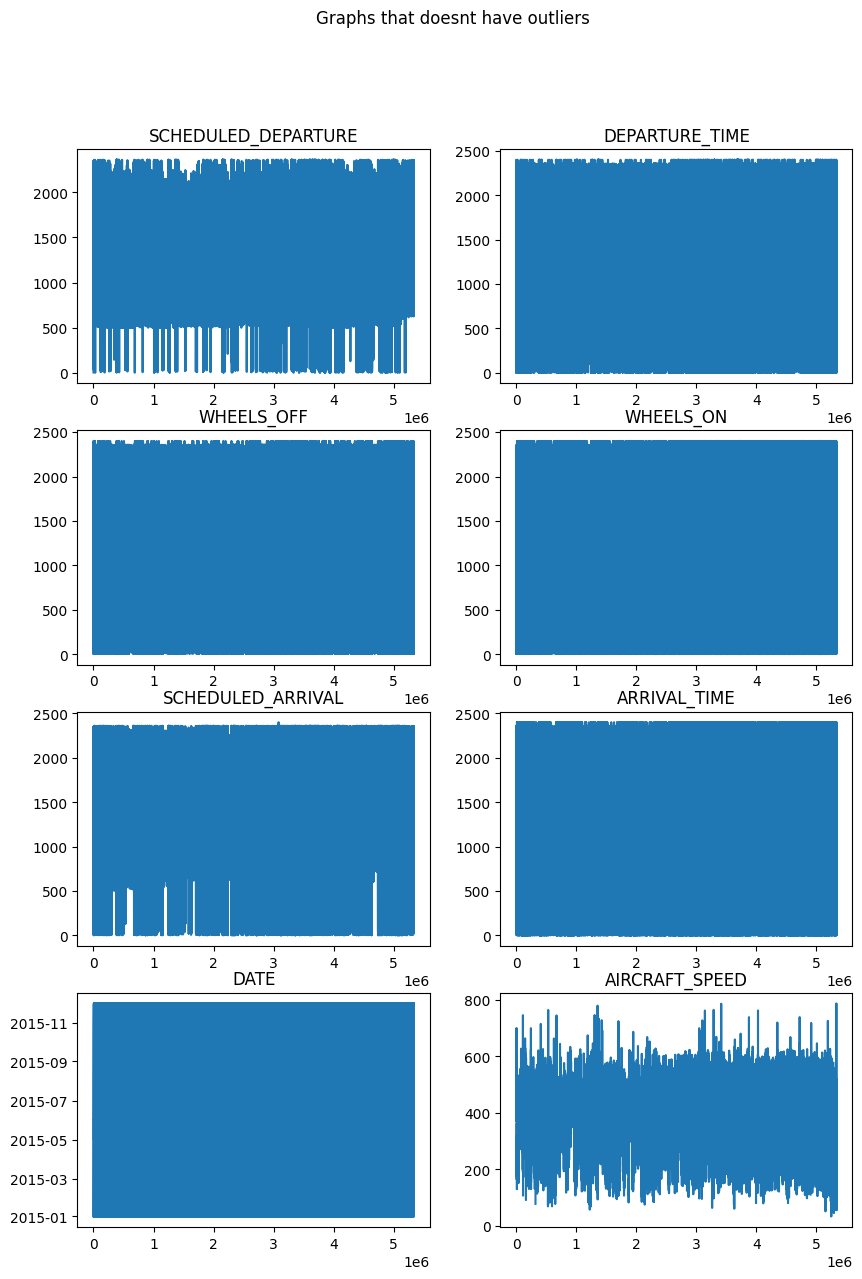

In [37]:
fig, axs = plt.subplots(4,2)
fig.set_figwidth(10)
fig.set_figheight(14)
fig.suptitle('Graphs that doesnt have outliers')
axs[0][0].plot(df['SCHEDULED_DEPARTURE'])
axs[0, 0].set_title('SCHEDULED_DEPARTURE')

axs[0][1].plot(df['DEPARTURE_TIME'])
axs[0, 1].set_title('DEPARTURE_TIME')

axs[1][0].plot(df['WHEELS_OFF'])
axs[1, 0].set_title('WHEELS_OFF')

axs[1][1].plot(df['WHEELS_ON'])
axs[1, 1].set_title('WHEELS_ON')

axs[2][0].plot(df['SCHEDULED_ARRIVAL'])
axs[2, 0].set_title('SCHEDULED_ARRIVAL')

axs[2][1].plot(df['ARRIVAL_TIME'])
axs[2, 1].set_title('ARRIVAL_TIME')

axs[3][0].plot(df['DATE'])
axs[3, 0].set_title('DATE')

axs[3][1].plot(df['AIRCRAFT_SPEED'])
axs[3, 1].set_title('AIRCRAFT_SPEED')


<h3>Now we will remove all the outliers</h3>

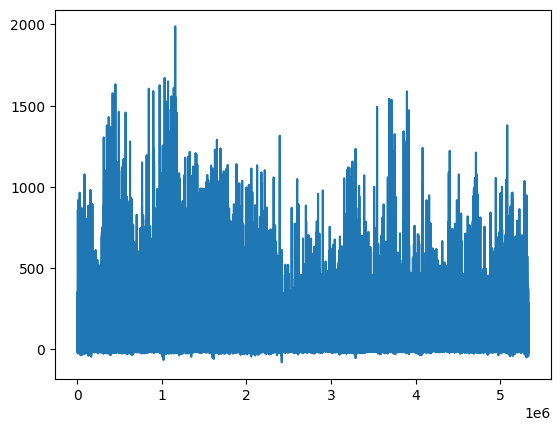

In [38]:
plt.plot(df['DEPARTURE_DELAY'])

<h5>We dropped all the rows that had a DEPARTURE_DELAY greater than 1700  </h5>

In [39]:
df = df.drop(df[df.DEPARTURE_DELAY >= 1700].index)

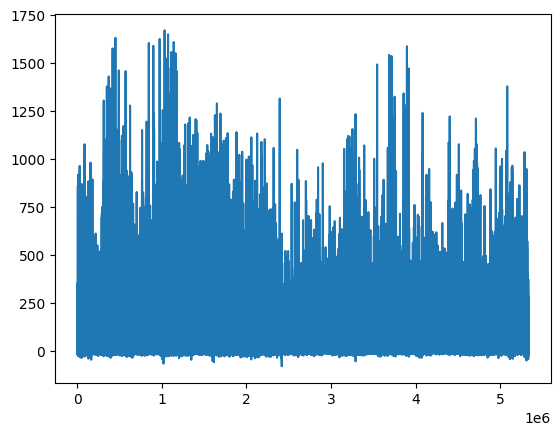

In [40]:
plt.plot(df['DEPARTURE_DELAY']) 

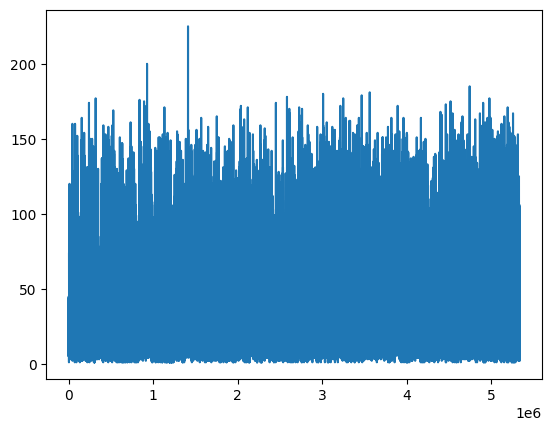

In [41]:
plt.plot(df['TAXI_OUT'])

<h5>We dropped all the rows that had a TAXI_OUT greater than 180  </h5>

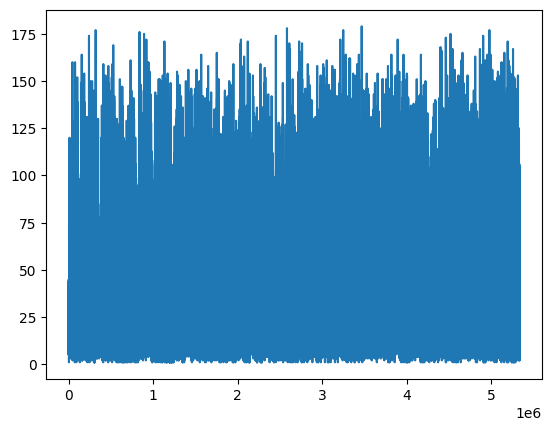

In [42]:
df = df.drop(df[df.TAXI_OUT >= 180].index)
plt.plot(df['TAXI_OUT']) 

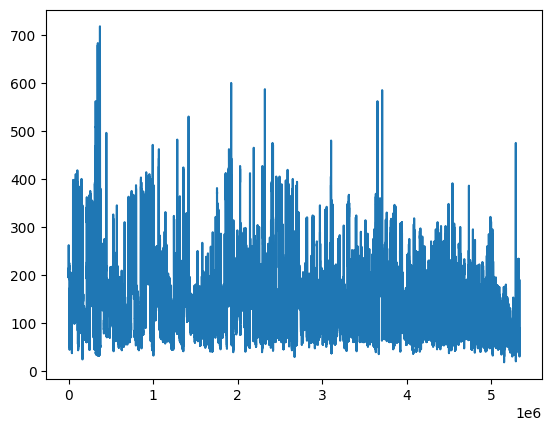

In [43]:
plt.plot(df['SCHEDULED_TIME'])

<h5>We dropped all the rows that had a SCHEDULED_TIME greater than 500  </h5>

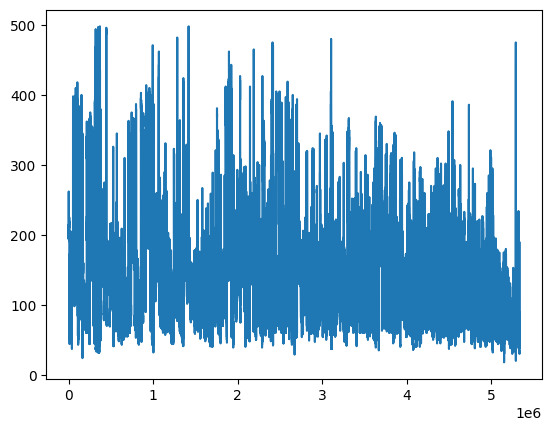

In [44]:
df = df.drop(df[df.SCHEDULED_TIME >= 500].index)
plt.plot(df['SCHEDULED_TIME']) 

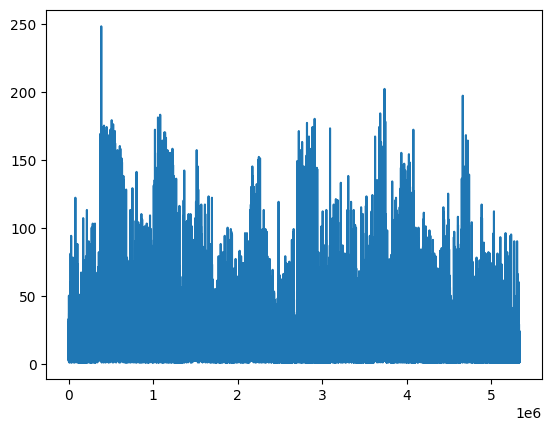

In [45]:
plt.plot(df['TAXI_IN'])

<h5>We dropped all the rows that had a TAXI_IN greater than 200  </h5>

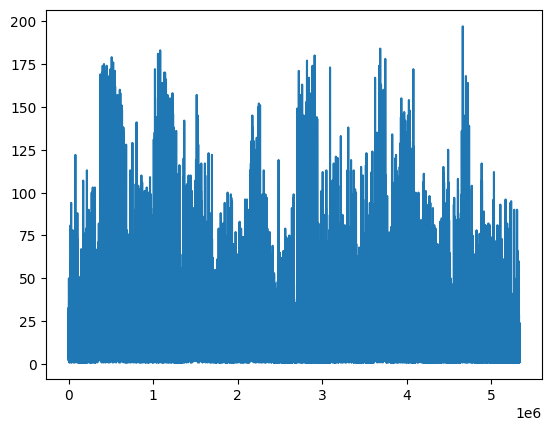

In [46]:
df = df.drop(df[df.TAXI_IN >= 200].index)
plt.plot(df['TAXI_IN']) 

<h5>Now we will change the type of FLIGHT_NUMBER from float64 to object so that the numbers can be categorized to make it easier to plot</h5>

In [47]:
df['FLIGHT_NUMBER'] = df['FLIGHT_NUMBER'].astype('object')

<h2>Data Visualization</h2>

<h5>Qestion 1: How accurate are the scheduled arrival time compared to the actual time the plane arrives? </h5>

<h5> We will now select the top 10 flight numbers that has the highest count since plotting 5 million data points will give plots that are all over the place</h5>

In [48]:
top_10_Flights = df['FLIGHT_NUMBER'].value_counts()[:10].index.tolist()

C:\Users\moham\AppData\Local\Temp\ipykernel_24348\1887587845.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  top_10_Flights = df['FLIGHT_NUMBER'].value_counts()[:10].index.tolist()


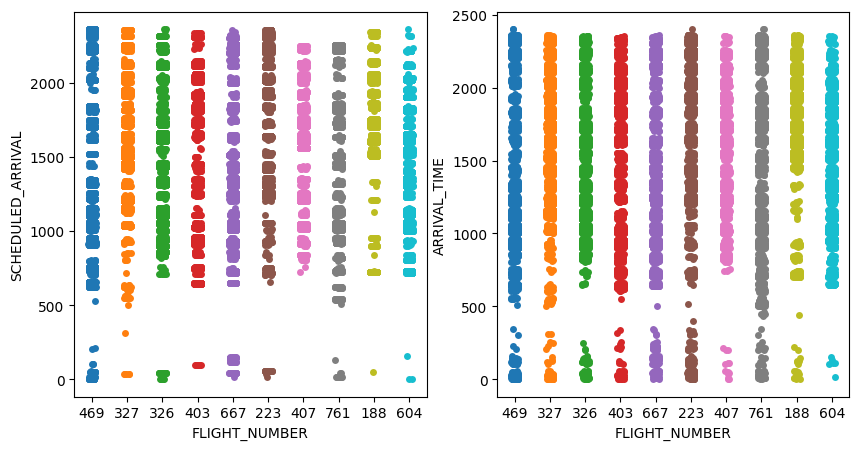

In [49]:
fig, axs = plt.subplots(ncols=2)
fig.set_figwidth(10)
fig.set_figheight(5)

for i in range(len(top_10_Flights)):
    flight = df['FLIGHT_NUMBER']== top_10_Flights[i]
    rows = df.loc[flight]
    sns.stripplot(x='FLIGHT_NUMBER', y='SCHEDULED_ARRIVAL', data=rows, ax=axs[0])
    
for i in range(len(top_10_Flights)):
    flight = df['FLIGHT_NUMBER']== top_10_Flights[i]
    rows = df.loc[flight]
    sns.stripplot(x='FLIGHT_NUMBER', y='ARRIVAL_TIME', data=rows, ax=axs[1])

<h5>The graph above shows the difference between the time the plane is expected to land and the actual time it landed at</h5>
<h5>As you can see the graph shows that when the scheduled arrival time is before 5 am the flights tend to be late, while flights that are scheduled after 5 am , are generally more accurate timings </h5>

<h5>Question 2: How many flights occur per month?</h5>

<AxesSubplot: xlabel='count', ylabel='DATE'>

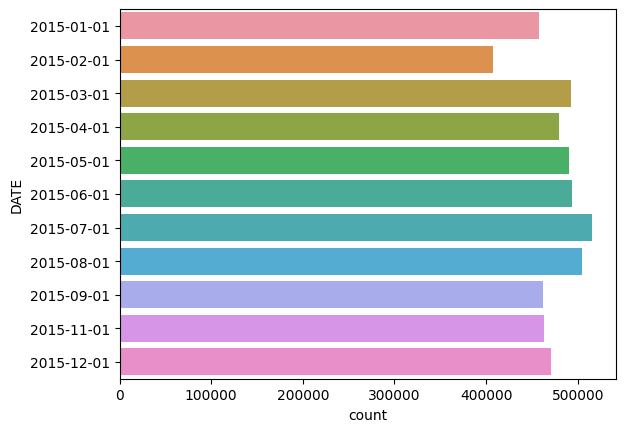

In [50]:
sns.countplot(y='DATE', data =df)


<h5>As shown in the graph above highest month was July and the least one was 10 which as shown from the data above had no flights at all</h5>

In [51]:
top_20_Origin_Cities = df['ORIGIN_CITY'].value_counts()[:20].index.tolist()

In [52]:
df2 = df.copy()
df2 = df2[df2.groupby('ORIGIN_CITY').ORIGIN_CITY.transform('count')>50000]
df3 = df.copy()
df3 = df3[df3.groupby('DESTINATION_CITY').DESTINATION_CITY.transform('count')>50000]

<AxesSubplot: xlabel='count', ylabel='DESTINATION_CITY'>

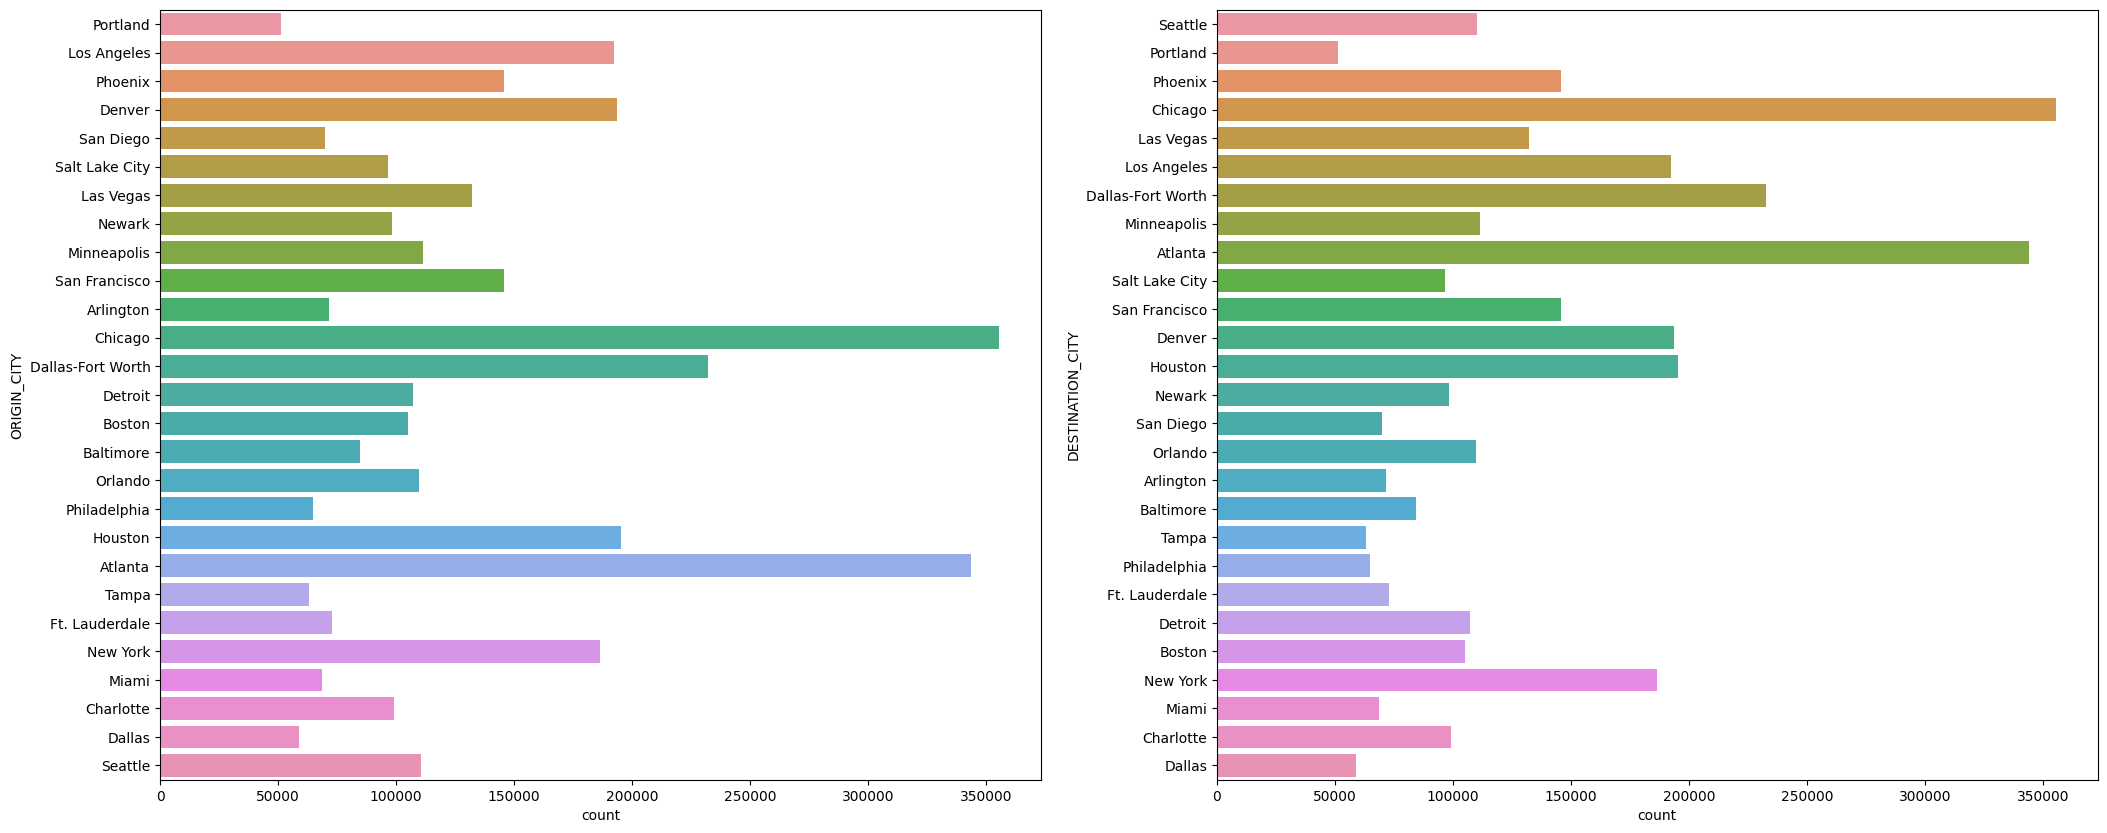

In [53]:
fig, axs = plt.subplots(ncols=2)
fig.set_figwidth(25)
fig.set_figheight(10)
sns.countplot(y= 'ORIGIN_CITY', data = df2, ax= axs[0])
sns.countplot(y= 'DESTINATION_CITY', data = df3, ax= axs[1])

<h5>As you can see Chicago and Atalanta are the most cities that have the highest number of exiting planes as well as the highest number of entering planes</h5>


<h5>Question 4: What is the normal distribution for speed in each of the top 5 airlines based on their count?</h5>

maybe: filter the number of airlines to be top 10 or smth

<AxesSubplot: xlabel='AIRCRAFT_SPEED', ylabel='Density'>

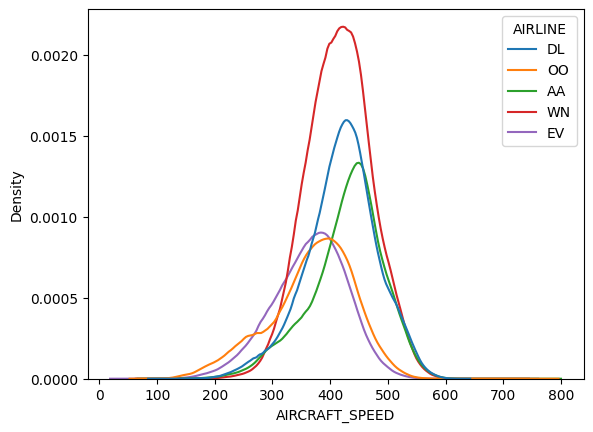

In [54]:
df2 = df.copy()
df2 = df2[df2.groupby('AIRLINE').AIRLINE.transform('count')>461519]

sns.kdeplot(x='AIRCRAFT_SPEED',hue='AIRLINE', data = df2)

<h5>As you can see the air craft speed vary from each airline as  the higher the range between the maximum speed and the minimum speed for each airline the more data spread across the graph</h5>